In [536]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
from datetime import datetime
import seaborn as sns
from collections import Counter

In [390]:
#loading the files with panda.
data_frame_member = pd.read_csv('members_v3.csv')
data_frame_train = pd.read_csv('train_v2.csv')
data_frame_user = pd.read_csv('user_logs_v2.csv')
user_logs = pd.DataFrame()
file_reader = pd.read_csv("user_logs_v2.csv", chunksize=2e7)
for chunk in file_reader:
    data_frame_user.append(chunk)

In [391]:
#adding the userlogs file and memers together by conceatenating 
user_logs_all = pd.concat([user_logs, data_frame_user])
user_logs_all.head()

,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,u9E91QDTvHLq6NXjEaWv8u4QIqhrHk72kE+w31Gnhdg=,20170331,8,4,0,1,21,18,6309.273
1,nTeWW/eOZA/UHKdD5L7DEqKKFTjaAj3ALLPoAWsU8n0=,20170330,2,2,1,0,9,11,2390.699
2,2UqkWXwZbIjs03dHLU9KHJNNEvEkZVzm69f3jCS+uLI=,20170331,52,3,5,3,84,110,23203.337
3,ycwLc+m2O0a85jSLALtr941AaZt9ai8Qwlg9n0Nql5U=,20170331,176,4,2,2,19,191,7100.454
4,EGcbTofOSOkMmQyN1NMLxHEXJ1yV3t/JdhGwQ9wXjnI=,20170331,2,1,0,1,112,93,28401.558


In [392]:
train_file = data_frame_train

In [393]:
train_file.head()

,msno,is_churn
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1


In [394]:
#merged_files = train_file.merge(data_frame_member, on=['msno']).merge(data_frame_user,how = 'left', on= ['msno'])

In [395]:
#mergning the train file with members and users.
merged_files = train_file.merge(data_frame_member,how = 'left', on=['msno']).merge(data_frame_user,how = 'left', on= ['msno'])

In [396]:
merged_files.head()

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,male,3.0,20131223.0,20170305.0,7.0,0.0,3.0,5.0,71.0,68.0,17599.893
1,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,male,3.0,20131223.0,20170301.0,138.0,19.0,7.0,1.0,21.0,158.0,8830.433
2,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,male,3.0,20131223.0,20170319.0,0.0,0.0,0.0,0.0,34.0,17.0,7883.313
3,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,male,3.0,20131223.0,20170316.0,15.0,0.0,0.0,1.0,38.0,17.0,9029.227
4,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,male,3.0,20131223.0,20170310.0,0.0,0.0,0.0,0.0,8.0,8.0,1870.110


In [397]:
#merged_files.to_csv("allinfo.csv")

In [398]:
all_info = pd.read_csv("allinfo.csv")

In [399]:
all_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13749353 entries, 0 to 13749352
Data columns (total 16 columns):
Unnamed: 0                int64
msno                      object
is_churn                  int64
city                      float64
bd                        float64
gender                    object
registered_via            float64
registration_init_time    float64
date                      float64
num_25                    float64
num_50                    float64
num_75                    float64
num_985                   float64
num_100                   float64
num_unq                   float64
total_secs                float64
dtypes: float64(12), int64(2), object(2)
memory usage: 1.6+ GB


In [400]:
all_info.head()

,Unnamed: 0,msno,is_churn,city,bd,gender,registered_via,registration_init_time,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,male,3.0,20131223.0,20170305.0,7.0,0.0,3.0,5.0,71.0,68.0,17599.893
1,1,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,male,3.0,20131223.0,20170301.0,138.0,19.0,7.0,1.0,21.0,158.0,8830.433
2,2,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,male,3.0,20131223.0,20170319.0,0.0,0.0,0.0,0.0,34.0,17.0,7883.313
3,3,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,male,3.0,20131223.0,20170316.0,15.0,0.0,0.0,1.0,38.0,17.0,9029.227
4,4,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,male,3.0,20131223.0,20170310.0,0.0,0.0,0.0,0.0,8.0,8.0,1870.110


In [401]:
#changing the format of registration date into year, month date format. 
#changing the format of the date as well and so on. 
all_info['registration_init_time'] = pd.to_datetime(all_info['registration_init_time'], format="%Y%m%d")
all_info['date'] = pd.to_datetime(all_info['date'], format="%Y%m%d")
#all_info['registration_init_time'] = pd.to_numeric(all_info['registration_init_time'], errors='ignore')
#all_info['date'] = pd.to_numeric(all_info['date'], errors='ignore')
#all_info['registration_init_time'] = pd.to_numeric(all_info['registration_init_time'], errors='coerce')
#all_info['date'] = pd.to_numeric(all_info['date'], errors='coerce')
#all_info.info()
#all_info['gender'] = all_info.gender.apply(lambda x: x if x != "female" else 1)
#all_info['gender'] = all_info.gender.apply(lambda x: x if x != "male" else 0)

In [402]:
all_info.head()

,Unnamed: 0,msno,is_churn,city,bd,gender,registered_via,registration_init_time,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,male,3.0,2013-12-23,2017-03-05,7.0,0.0,3.0,5.0,71.0,68.0,17599.893
1,1,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,male,3.0,2013-12-23,2017-03-01,138.0,19.0,7.0,1.0,21.0,158.0,8830.433
2,2,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,male,3.0,2013-12-23,2017-03-19,0.0,0.0,0.0,0.0,34.0,17.0,7883.313
3,3,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,male,3.0,2013-12-23,2017-03-16,15.0,0.0,0.0,1.0,38.0,17.0,9029.227
4,4,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,male,3.0,2013-12-23,2017-03-10,0.0,0.0,0.0,0.0,8.0,8.0,1870.110


In [403]:
#here we go by the idea fill all the gender values with 1 or 0. 
all_info['gender'] = all_info.gender.apply(lambda x: x if x != 'female' else 1)
all_info['gender'] = all_info.gender.apply(lambda x: x if x != 'male' else 0)

In [404]:
all_info.head()

,Unnamed: 0,msno,is_churn,city,bd,gender,registered_via,registration_init_time,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,0.0,3.0,2013-12-23,2017-03-05,7.0,0.0,3.0,5.0,71.0,68.0,17599.893
1,1,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,0.0,3.0,2013-12-23,2017-03-01,138.0,19.0,7.0,1.0,21.0,158.0,8830.433
2,2,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,0.0,3.0,2013-12-23,2017-03-19,0.0,0.0,0.0,0.0,34.0,17.0,7883.313
3,3,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,0.0,3.0,2013-12-23,2017-03-16,15.0,0.0,0.0,1.0,38.0,17.0,9029.227
4,4,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,0.0,3.0,2013-12-23,2017-03-10,0.0,0.0,0.0,0.0,8.0,8.0,1870.110


In [407]:
#all_info.to_csv('lastfinally.csv')

In [408]:
""""the_file = all_info.loc[all_info.groupby('msno')['date'].idxmax()]
print(the_file.head())
print(len(the_file))
"""

'"the_file = all_info.loc[all_info.groupby(\'msno\')[\'date\'].idxmax()]\nprint(the_file.head())\nprint(len(the_file))\n'

In [409]:
#the_file.to_csv("thelatestperceptron.csv")

In [410]:
the_file_new = pd.read_csv('thelatestperceptron.csv')

In [411]:
the_file_new.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,msno,is_churn,city,bd,gender,registered_via,registration_init_time,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,0,0,0,10737820.0,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,0.0,1.0,0.0,NaN,7.0,2014-06-08,2017-03-31,16.0,12.0,5.0,12.0,39.0,51.0,14239.044
1,1,1,1,11278361.0,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,0.0,15.0,26.0,0.0,9.0,2010-11-18,2017-03-31,0.0,0.0,0.0,0.0,5.0,5.0,1287.132
2,2,2,2,11682231.0,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,0.0,1.0,0.0,NaN,7.0,2014-09-27,2017-03-30,9.0,2.0,2.0,1.0,18.0,18.0,4921.827
3,3,3,3,9237333.0,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,0.0,18.0,21.0,0.0,7.0,2016-03-15,2017-03-31,2.0,2.0,1.0,1.0,10.0,4.0,3266.534
4,4,4,4,2683479.0,++/UDNo9DLrxT8QVGiDi1OnWfczAdEwThaVyD0fXO50=,0.0,22.0,32.0,0.0,9.0,2012-01-22,2017-03-30,0.0,0.0,0.0,0.0,3.0,3.0,838.686


In [413]:
#deleting the unamed values
the_file_new.pop("Unnamed: 0")

0              0
1              1
2              2
3              3
4              4
5              5
6              6
7              7
8              8
9              9
10            10
11            11
12            12
13            13
14            14
15            15
16            16
17            17
18            18
19            19
20            20
21            21
22            22
23            23
24            24
25            25
26            26
27            27
28            28
29            29
           ...  
970930    970930
970931    970931
970932    970932
970933    970933
970934    970934
970935    970935
970936    970936
970937    970937
970938    970938
970939    970939
970940    970940
970941    970941
970942    970942
970943    970943
970944    970944
970945    970945
970946    970946
970947    970947
970948    970948
970949    970949
970950    970950
970951    970951
970952    970952
970953    970953
970954    970954
970955    970955
970956    970956
970957    9709

In [414]:
the_file_new.pop("Unnamed: 0.1")

0              0
1              1
2              2
3              3
4              4
5              5
6              6
7              7
8              8
9              9
10            10
11            11
12            12
13            13
14            14
15            15
16            16
17            17
18            18
19            19
20            20
21            21
22            22
23            23
24            24
25            25
26            26
27            27
28            28
29            29
           ...  
970930    970930
970931    970931
970932    970932
970933    970933
970934    970934
970935    970935
970936    970936
970937    970937
970938    970938
970939    970939
970940    970940
970941    970941
970942    970942
970943    970943
970944    970944
970945    970945
970946    970946
970947    970947
970948    970948
970949    970949
970950    970950
970951    970951
970952    970952
970953    970953
970954    970954
970955    970955
970956    970956
970957    9709

In [415]:
the_file_new.pop("Unnamed: 0.1.1")

0              0
1              1
2              2
3              3
4              4
5              5
6              6
7              7
8              8
9              9
10            10
11            11
12            12
13            13
14            14
15            15
16            16
17            17
18            18
19            19
20            20
21            21
22            22
23            23
24            24
25            25
26            26
27            27
28            28
29            29
           ...  
970930    970930
970931    970931
970932    970932
970933    970933
970934    970934
970935    970935
970936    970936
970937    970937
970938    970938
970939    970939
970940    970940
970941    970941
970942    970942
970943    970943
970944    970944
970945    970945
970946    970946
970947    970947
970948    970948
970949    970949
970950    970950
970951    970951
970952    970952
970953    970953
970954    970954
970955    970955
970956    970956
970957    9709

In [416]:
the_file_new.pop("Unnamed: 0.1.1.1")

0         10737820.0
1         11278361.0
2         11682231.0
3          9237333.0
4          2683479.0
5         10610935.0
6         12524911.0
7          6887069.0
8         11931770.0
9                NaN
10               NaN
11        13399558.0
12        11322316.0
13               NaN
14               NaN
15         6577080.0
16        10872176.0
17         4083251.0
18        10882466.0
19        11866699.0
20         1499842.0
21         6045697.0
22               NaN
23               NaN
24               NaN
25        11649284.0
26               NaN
27         1856980.0
28         9492149.0
29               NaN
             ...    
970930      731605.0
970931           NaN
970932     8504219.0
970933           NaN
970934     2787271.0
970935      790800.0
970936     3633473.0
970937           NaN
970938     9560315.0
970939     4708719.0
970940     8315772.0
970941    12411241.0
970942           NaN
970943     4893106.0
970944    12878355.0
970945     1298059.0
970946    135

In [417]:
the_file_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970960 entries, 0 to 970959
Data columns (total 15 columns):
msno                      754551 non-null object
is_churn                  754551 non-null float64
city                      754532 non-null float64
bd                        754532 non-null float64
gender                    363700 non-null float64
registered_via            754532 non-null float64
registration_init_time    754532 non-null object
date                      754551 non-null object
num_25                    754551 non-null float64
num_50                    754551 non-null float64
num_75                    754551 non-null float64
num_985                   754551 non-null float64
num_100                   754551 non-null float64
num_unq                   754551 non-null float64
total_secs                754551 non-null float64
dtypes: float64(12), object(3)
memory usage: 111.1+ MB


In [418]:
the_file_two = pd.read_csv('all_info')

In [419]:
the_file_two.head()

,Unnamed: 0,Unnamed: 0.1,msno,is_churn,city,bd,gender,registered_via,registration_init_time,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,0,0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,0.0,3.0,2013-12-23,2017-03-05,7.0,0.0,3.0,5.0,71.0,68.0,17599.893
1,1,1,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,0.0,3.0,2013-12-23,2017-03-01,138.0,19.0,7.0,1.0,21.0,158.0,8830.433
2,2,2,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,0.0,3.0,2013-12-23,2017-03-19,0.0,0.0,0.0,0.0,34.0,17.0,7883.313
3,3,3,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,0.0,3.0,2013-12-23,2017-03-16,15.0,0.0,0.0,1.0,38.0,17.0,9029.227
4,4,4,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,0.0,3.0,2013-12-23,2017-03-10,0.0,0.0,0.0,0.0,8.0,8.0,1870.110


In [420]:
the_file_two.pop("Unnamed: 0")
the_file_two.pop("Unnamed: 0.1")

0                0
1                1
2                2
3                3
4                4
5                5
6                6
7                7
8                8
9                9
10              10
11              11
12              12
13              13
14              14
15              15
16              16
17              17
18              18
19              19
20              20
21              21
22              22
23              23
24              24
25              25
26              26
27              27
28              28
29              29
            ...   
4066295    4066295
4066296    4066296
4066297    4066297
4066298    4066298
4066299    4066299
4066300    4066300
4066301    4066301
4066302    4066302
4066303    4066303
4066304    4066304
4066305    4066305
4066306    4066306
4066307    4066307
4066308    4066308
4066309    4066309
4066310    4066310
4066311    4066311
4066312    4066312
4066313    4066313
4066314    4066314
4066315    4066315
4066316    4

In [479]:
the_file_two.head()

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,0.0,3.0,2013-12-23,2017-03-05,7.0,0.0,3.0,5.0,71.0,68.0,17599.893
1,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,0.0,3.0,2013-12-23,2017-03-01,138.0,19.0,7.0,1.0,21.0,158.0,8830.433
2,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,0.0,3.0,2013-12-23,2017-03-19,0.0,0.0,0.0,0.0,34.0,17.0,7883.313
3,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,0.0,3.0,2013-12-23,2017-03-16,15.0,0.0,0.0,1.0,38.0,17.0,9029.227
4,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,0.0,3.0,2013-12-23,2017-03-10,0.0,0.0,0.0,0.0,8.0,8.0,1870.110


In [480]:
the_file_new.head()

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,0.0,1,0.0,NaN,7,2014-06-08,2017-03-31,16.0,12.0,5.0,12.0,39.0,51.0,14239.044
1,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,0.0,15,26.0,0.0,9,2010-11-18,2017-03-31,0.0,0.0,0.0,0.0,5.0,5.0,1287.132
2,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,0.0,1,0.0,NaN,7,2014-09-27,2017-03-30,9.0,2.0,2.0,1.0,18.0,18.0,4921.827
3,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,0.0,18,21.0,0.0,7,2016-03-15,2017-03-31,2.0,2.0,1.0,1.0,10.0,4.0,3266.534
4,++/UDNo9DLrxT8QVGiDi1OnWfczAdEwThaVyD0fXO50=,0.0,22,32.0,0.0,9,2012-01-22,2017-03-30,0.0,0.0,0.0,0.0,3.0,3.0,838.686


In [481]:
the_file_two.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4066325 entries, 0 to 4066324
Data columns (total 15 columns):
msno                      object
is_churn                  int64
city                      float64
bd                        float64
gender                    float64
registered_via            float64
registration_init_time    object
date                      object
num_25                    float64
num_50                    float64
num_75                    float64
num_985                   float64
num_100                   float64
num_unq                   float64
total_secs                float64
dtypes: float64(11), int64(1), object(3)
memory usage: 465.4+ MB


In [483]:
the_file_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 754551 entries, 0 to 970959
Data columns (total 15 columns):
msno                      754551 non-null object
is_churn                  754551 non-null float64
city                      754551 non-null int64
bd                        754532 non-null float64
gender                    363700 non-null float64
registered_via            754551 non-null int64
registration_init_time    754532 non-null object
date                      754551 non-null object
num_25                    754551 non-null float64
num_50                    754551 non-null float64
num_75                    754551 non-null float64
num_985                   754551 non-null float64
num_100                   754551 non-null float64
num_unq                   754551 non-null float64
total_secs                754551 non-null float64
dtypes: float64(10), int64(2), object(3)
memory usage: 92.1+ MB


In [490]:
#applying the inter for city
the_file_new['city'] = the_file_new.city.apply(lambda x: int(x) if pd.notnull(x) else 0)

In [491]:
newest_variable = the_file_new;

In [492]:
#changening the bd to a float
newest_variable['bd'] = newest_variable.bd.apply(lambda x: float(x))

In [493]:
city_order = new_variable['city'].unique()
city_order=sorted(city_order, key=lambda x: float(x))

In [494]:
newest_variable.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 754551 entries, 0 to 970959
Data columns (total 15 columns):
msno                      754551 non-null object
is_churn                  754551 non-null float64
city                      754551 non-null int64
bd                        754532 non-null float64
gender                    363700 non-null float64
registered_via            754551 non-null int64
registration_init_time    754532 non-null object
date                      754551 non-null object
num_25                    754551 non-null float64
num_50                    754551 non-null float64
num_75                    754551 non-null float64
num_985                   754551 non-null float64
num_100                   754551 non-null float64
num_unq                   754551 non-null float64
total_secs                754551 non-null float64
dtypes: float64(10), int64(2), object(3)
memory usage: 92.1+ MB


In [495]:
newest_newest_variable = newest_variable

In [496]:
newest_newest_variable.dropna(inplace=True, thresh=10)

In [497]:
newest_newest_variable.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 754551 entries, 0 to 970959
Data columns (total 15 columns):
msno                      754551 non-null object
is_churn                  754551 non-null float64
city                      754551 non-null int64
bd                        754532 non-null float64
gender                    363700 non-null float64
registered_via            754551 non-null int64
registration_init_time    754532 non-null object
date                      754551 non-null object
num_25                    754551 non-null float64
num_50                    754551 non-null float64
num_75                    754551 non-null float64
num_985                   754551 non-null float64
num_100                   754551 non-null float64
num_unq                   754551 non-null float64
total_secs                754551 non-null float64
dtypes: float64(10), int64(2), object(3)
memory usage: 92.1+ MB


In [498]:
newest_newest_variable['city'] = newest_newest_variable.city.apply(lambda x: int(x) if pd.notnull(x) else 0)

In [499]:
newest_newest_variable.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 754551 entries, 0 to 970959
Data columns (total 15 columns):
msno                      754551 non-null object
is_churn                  754551 non-null float64
city                      754551 non-null int64
bd                        754532 non-null float64
gender                    363700 non-null float64
registered_via            754551 non-null int64
registration_init_time    754532 non-null object
date                      754551 non-null object
num_25                    754551 non-null float64
num_50                    754551 non-null float64
num_75                    754551 non-null float64
num_985                   754551 non-null float64
num_100                   754551 non-null float64
num_unq                   754551 non-null float64
total_secs                754551 non-null float64
dtypes: float64(10), int64(2), object(3)
memory usage: 92.1+ MB


In [500]:
#filling the gender with a value of 0.5
newest_newest_variable['gender']=newest_newest_variable['gender'].fillna("0.5")

In [501]:
newest_newest_variable.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 754551 entries, 0 to 970959
Data columns (total 15 columns):
msno                      754551 non-null object
is_churn                  754551 non-null float64
city                      754551 non-null int64
bd                        754532 non-null float64
gender                    754551 non-null object
registered_via            754551 non-null int64
registration_init_time    754532 non-null object
date                      754551 non-null object
num_25                    754551 non-null float64
num_50                    754551 non-null float64
num_75                    754551 non-null float64
num_985                   754551 non-null float64
num_100                   754551 non-null float64
num_unq                   754551 non-null float64
total_secs                754551 non-null float64
dtypes: float64(9), int64(2), object(4)
memory usage: 92.1+ MB


In [502]:
newest_newest_variable['registration_init_time'] = newest_newest_variable.registration_init_time.apply(lambda x: (datetime.now() - datetime.strptime(str(x)[:10], "%Y-%m-%d")).days if pd.notnull(x) else 0 )

In [503]:
newest_newest_variable.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 754551 entries, 0 to 970959
Data columns (total 15 columns):
msno                      754551 non-null object
is_churn                  754551 non-null float64
city                      754551 non-null int64
bd                        754532 non-null float64
gender                    754551 non-null object
registered_via            754551 non-null int64
registration_init_time    754551 non-null int64
date                      754551 non-null object
num_25                    754551 non-null float64
num_50                    754551 non-null float64
num_75                    754551 non-null float64
num_985                   754551 non-null float64
num_100                   754551 non-null float64
num_unq                   754551 non-null float64
total_secs                754551 non-null float64
dtypes: float64(9), int64(3), object(3)
memory usage: 92.1+ MB


In [504]:
#now we can finally try the perceptron algorithm

In [505]:
perceptron_algo = newest_newest_variable.sample(frac=1).reset_index(drop=True)

In [506]:
perceptron_algo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754551 entries, 0 to 754550
Data columns (total 15 columns):
msno                      754551 non-null object
is_churn                  754551 non-null float64
city                      754551 non-null int64
bd                        754532 non-null float64
gender                    754551 non-null object
registered_via            754551 non-null int64
registration_init_time    754551 non-null int64
date                      754551 non-null object
num_25                    754551 non-null float64
num_50                    754551 non-null float64
num_75                    754551 non-null float64
num_985                   754551 non-null float64
num_100                   754551 non-null float64
num_unq                   754551 non-null float64
total_secs                754551 non-null float64
dtypes: float64(9), int64(3), object(3)
memory usage: 86.4+ MB


In [507]:
perceptron_algo.pop('date')

0         2017-03-31
1         2017-03-24
2         2017-03-31
3         2017-03-31
4         2017-03-28
5         2017-03-30
6         2017-03-31
7         2017-03-30
8         2017-03-31
9         2017-03-31
10        2017-03-15
11        2017-03-29
12        2017-03-31
13        2017-03-25
14        2017-03-29
15        2017-03-31
16        2017-03-31
17        2017-03-31
18        2017-03-31
19        2017-03-30
20        2017-03-22
21        2017-03-31
22        2017-03-30
23        2017-03-31
24        2017-03-31
25        2017-03-30
26        2017-03-30
27        2017-03-28
28        2017-03-31
29        2017-03-31
             ...    
754521    2017-03-31
754522    2017-03-30
754523    2017-03-23
754524    2017-03-27
754525    2017-03-16
754526    2017-03-27
754527    2017-03-29
754528    2017-03-31
754529    2017-03-31
754530    2017-03-31
754531    2017-03-28
754532    2017-03-31
754533    2017-03-31
754534    2017-03-31
754535    2017-03-30
754536    2017-03-30
754537    201

In [508]:
perceptron_algo.pop('msno')

0         gyw5O6yuMlWawBQj5vUebhElhmame26gsvykr6AwxMI=
1         m4xWzfoEsUYfklcWi0CbOq54/gIpiH4mPmNoY6YlGew=
2         i6KiID+Y3t/Hazxc/3hYH9maBU0z/wIOgFiA8lK356I=
3         qZkqr5Ly3D2z5mKbilZaWKRtBarMfY+EGOWDVWe3Uic=
4         URI7gk84e8elrOz40VF9H82DEgPRn1hRiwjmhDwIMMA=
5         YIGYJstV/BjNAYIuH0WJWCKRxtk5J74AnPKMSfH6uGM=
6         eeGyhcj2VX2ZxrYH0Uff5KFDpqP/8ek+OJEK69/uqis=
7         Jf85AtCYe7qmzIUxzWfx++/gJ8AwfxqcDI4F2dKN+y4=
8         r+W0pVtFFjm9aoOEYgsleYICe3A1noTKgcF3O2RkKHA=
9         uoIwCE7gQEyZdnyH4/4zzj/j0ZMABr6uo8wFcnYiFjQ=
10        F1CoXztxSuKg+FkBYREgge2s0sX9ANOT5JVar2AwzQI=
11        6YYE0TrchudG5Z8XcGzAuziX8c+gyImKUOjP9OLvzRA=
12        KDrj41Yj5THxKxA/Xx/Q9CGCsMGPV7Vs5GwIqzvbUSg=
13        0XAr69KXWnst0NOkgZ8T2WtRN6DKlkfpZEoPiRGyS0U=
14        g5A9m7FCjzoxQpj4PTyUFZ4bwAMEh1M0SkMPHEKvvUw=
15        cZfXHujtB4VZaK2amRB/EmQ8vG32zydiUrvIAaIonY8=
16        mSbvhitDHYUbUwxTOMOztaOYolk77XZ1pzhsCgEfAdY=
17        UloRKMHYDvmVjNrS7dYGE7so53m+9mbX7DnDBjNWmzY=
18        

In [509]:
perceptron_algo['city'] = perceptron_algo.city.apply(lambda x: int(x) if pd.notnull(x) else "NAN")
perceptron_algo['registered_via'] = perceptron_algo.registered_via.apply(lambda x: int(x) if pd.notnull(x) else "NAN")
perceptron_algo['gender']=perceptron_algo['gender'].fillna("NAN")
#perceptron_algo.pop('is_churn')

In [510]:
""" Do not change. """

from abc import ABC, abstractmethod
import numpy as np

class Perceptron(ABC):
    """ Base class for our perceptrons.
    """
    def __init__(self, lr=0.5, epochs=100):
        """ Constructor. """
        self.learning_rate = lr
        self.epochs = epochs
        self.weights = None
    def evaluate(self, X, y):
        """ Get prediction accuracy against a test set. """
        predictions = self.predict(X)
        return np.count_nonzero(predictions == y) / y.shape[0]
    def predict(self, X):
        """ Predict labels for a list of inputs. """
        predictions = []
        for x in X:
            prediction = 0 if np.dot(self.weights, x) < 0 else 1
            predictions.append(prediction)
        return np.array(predictions)
    @abstractmethod
    def fit(self):
        """ Abstract training method. """
        pass

In [511]:
""" Do not change. """

class SimplePerceptron(Perceptron):
    """ 
    Simple perceptron. 
    Extends the abstract class above by implementing fit().
    """
    def fit(self, X, y):
        """ Simple perceptron training. """
        self.weights = np.random.randn(X.shape[1])
        for epoch in range(self.epochs):
            # the training data is shuffled every epoch
            the_data = list(zip(X, y))
            np.random.shuffle(the_data)
            for x, label in the_data:
                # attempt prediction
                prediction = 0 if np.dot(self.weights, x) <= 0 else 1
                # if the prediction fails, update the weights
                if prediction != label:
                    update = self.learning_rate * (label - prediction) * x
                    self.weights += update

In [515]:
# the breast cancer dataset
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import f1_score
data = load_breast_cancer()

X = np.array(data['data'])  # data points
y = np.array(data['target'])  # labels

b = np.ones_like(y)  # bias
X = np.column_stack((X, b))  # gets glued to data

In [516]:
# x- and y-axis values for plotting
xs = []
# ys_averaged = []  # UNCOMMENT THIS LINE
ys_simple = []

# stack the data together for shuffling
the_data = np.column_stack((X, y))
# 50% of the data for training, 50% for testing
cutoff = len(the_data) // 2

# test these epoch numbers
for epochs in range(0, 51, 5):
    xs.append(epochs)
    # scores_averaged = []  # UNCOMMENT THIS LINE
    scores_simple = []

    # do 10 runs for each epoch
    for experiments in range(0, 10):

        # prepare training and test data
        # the data is randomly shuffled for each experiment
        np.random.shuffle(the_data)
        X_train = the_data[:cutoff,:-2]
        y_train = the_data[:cutoff,-1]
        X_test = the_data[cutoff:,:-2]
        y_test = the_data[cutoff:,-1]
        
        # create the perceptrons
        # averaged_perceptron = AveragedPerceptron(epochs=epochs)  # UNCOMMENT THIS LINE
        simple_perceptron = SimplePerceptron(epochs=epochs)
        # train the perceptrons with training data
        # averaged_perceptron.fit(X_train, y_train)  # UNCOMMENT THIS LINE
        simple_perceptron.fit(X_train, y_train)
        # evaluate the perceptrons against test data
        # scores_averaged.append(averaged_perceptron.evaluate(X_test, y_test))  # UNCOMMENT THIS LINE
        scores_simple.append(simple_perceptron.evaluate(X_test, y_test))

    # store the experiment means for plotting
    # ys_averaged.append(np.mean(scores_averaged))  # UNCOMMENT THIS LINE
    ys_simple.append(np.mean(scores_simple))

# print("averaged: {:.2f}".format(ys_averaged[-1]))  # UNCOMMENT THIS LINE
print("simple: {:.2f}".format(ys_simple[-1]))

simple: 0.87


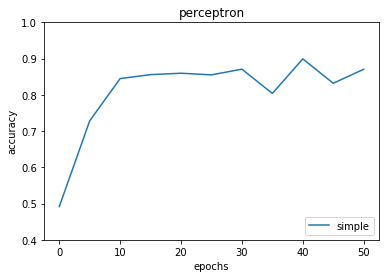

In [517]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.title("perceptron")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0.4, 1)

# plt.plot(xs, ys_averaged, label="averaged")  # UNCOMMENT THIS LINE
plt.plot(xs, ys_simple, label="simple")
plt.legend(loc=4)
plt.show()

In [591]:
used_for_f_scores = pd.read_csv('thelatestperceptron.csv')

In [592]:
used_for_f_scores.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,msno,is_churn,city,bd,gender,registered_via,registration_init_time,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,0,0,0,10737820.0,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,0.0,1.0,0.0,NaN,7.0,2014-06-08,2017-03-31,16.0,12.0,5.0,12.0,39.0,51.0,14239.044
1,1,1,1,11278361.0,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,0.0,15.0,26.0,0.0,9.0,2010-11-18,2017-03-31,0.0,0.0,0.0,0.0,5.0,5.0,1287.132
2,2,2,2,11682231.0,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,0.0,1.0,0.0,NaN,7.0,2014-09-27,2017-03-30,9.0,2.0,2.0,1.0,18.0,18.0,4921.827
3,3,3,3,9237333.0,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,0.0,18.0,21.0,0.0,7.0,2016-03-15,2017-03-31,2.0,2.0,1.0,1.0,10.0,4.0,3266.534
4,4,4,4,2683479.0,++/UDNo9DLrxT8QVGiDi1OnWfczAdEwThaVyD0fXO50=,0.0,22.0,32.0,0.0,9.0,2012-01-22,2017-03-30,0.0,0.0,0.0,0.0,3.0,3.0,838.686


In [593]:
used_for_f_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970960 entries, 0 to 970959
Data columns (total 19 columns):
Unnamed: 0                970960 non-null int64
Unnamed: 0.1              970960 non-null int64
Unnamed: 0.1.1            970960 non-null int64
Unnamed: 0.1.1.1          754551 non-null float64
msno                      754551 non-null object
is_churn                  754551 non-null float64
city                      754532 non-null float64
bd                        754532 non-null float64
gender                    363700 non-null float64
registered_via            754532 non-null float64
registration_init_time    754532 non-null object
date                      754551 non-null object
num_25                    754551 non-null float64
num_50                    754551 non-null float64
num_75                    754551 non-null float64
num_985                   754551 non-null float64
num_100                   754551 non-null float64
num_unq                   754551 non-null float6

In [594]:
used_for_f_scores.dropna(inplace=True, thresh=10)

Changing the format of city and registered_via( except missing values) from float to int and changing blank values with 0, 0.5( for city, registered_via and gender)

In [595]:
used_for_f_scores['city'] = used_for_f_scores.city.apply(lambda x: int(x) if pd.notnull(x) else 0)

In [596]:
used_for_f_scores['registered_via'] = used_for_f_scores.registered_via.apply(lambda x: int(x) if pd.notnull(x) else 0)

In [597]:
used_for_f_scores['gender']=used_for_f_scores['gender'].fillna("0.5")

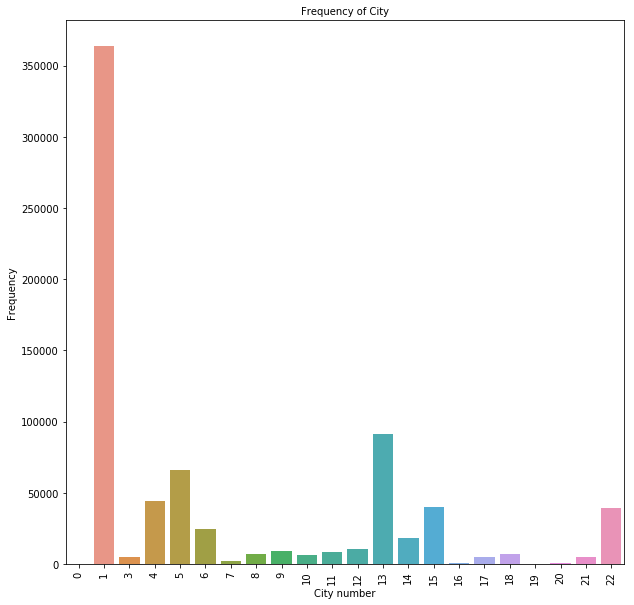

City Count [(1, 363504), (13, 91338), (5, 65940), (4, 44234), (15, 40326), (22, 39264), (6, 24335), (14, 18555), (12, 10683), (9, 8903), (11, 8507), (18, 7228), (8, 7044), (10, 6097), (17, 5015), (21, 4851), (3, 4695), (7, 2432), (16, 851), (20, 603), (19, 127), (0, 19)]


In [598]:
#Frequency of City
plt.figure(figsize=(10,10))
plt.hist(411)
city_order = used_for_f_scores['city'].unique()
city_order=sorted(city_order, key=lambda x: float(x))
sns.countplot(x="city", data=used_for_f_scores , order = city_order)
plt.ylabel('Frequency', fontsize=10)
plt.xlabel('City number', fontsize=10)
plt.xticks(rotation='vertical')
plt.title("Frequency of City", fontsize=10)
plt.show()
city_count = Counter(used_for_f_scores['city']).most_common()
print("City Count " +str(city_count))

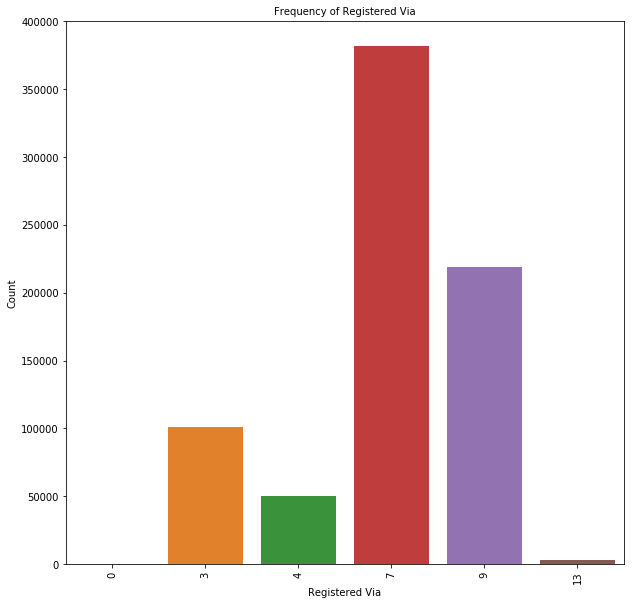

Registered Via Count [(7, 381421), (9, 218740), (3, 100933), (4, 50459), (13, 2979), (0, 19)]


In [599]:
#Frequency of Registered via
plt.figure(figsize=(10,10))
plt.hist(412)
R_V_order = used_for_f_scores['registered_via'].unique()
R_V_order = sorted(R_V_order, key=lambda x: str(x))
R_V_order = sorted(R_V_order, key=lambda x: float(x))
sns.countplot(x="registered_via", data=used_for_f_scores,order = R_V_order)
plt.ylabel('Count', fontsize=10)
plt.xlabel('Registered Via', fontsize=10)
plt.xticks(rotation='vertical')
plt.title("Frequency of Registered Via", fontsize=10)
plt.show()
RV_count = Counter(used_for_f_scores['registered_via']).most_common()
print("Registered Via Count " +str(RV_count))

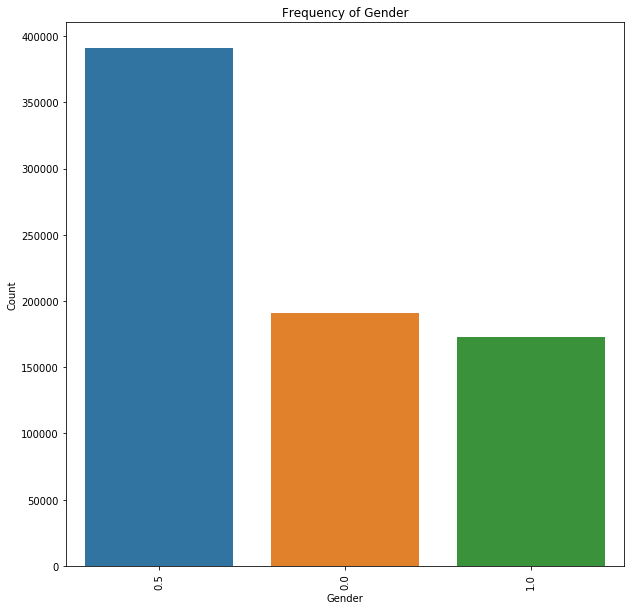

Gender Count [('0.5', 390851), (0.0, 190647), (1.0, 173053)]


In [600]:
#Gender count
plt.figure(figsize=(10,10))
plt.hist(413)
sns.countplot(x="gender", data=used_for_f_scores)
plt.ylabel('Count', fontsize=10)
plt.xlabel('Gender', fontsize=10)
plt.xticks(rotation='vertical')
plt.title("Frequency of Gender", fontsize=12)
plt.show()
gender_count = Counter(used_for_f_scores['gender']).most_common()
print("Gender Count " +str(gender_count))

In [601]:
used_for_f_scores.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,msno,is_churn,city,bd,gender,registered_via,registration_init_time,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,0,0,0,10737820.0,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,0.0,1,0.0,0.5,7,2014-06-08,2017-03-31,16.0,12.0,5.0,12.0,39.0,51.0,14239.044
1,1,1,1,11278361.0,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,0.0,15,26.0,0,9,2010-11-18,2017-03-31,0.0,0.0,0.0,0.0,5.0,5.0,1287.132
2,2,2,2,11682231.0,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,0.0,1,0.0,0.5,7,2014-09-27,2017-03-30,9.0,2.0,2.0,1.0,18.0,18.0,4921.827
3,3,3,3,9237333.0,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,0.0,18,21.0,0,7,2016-03-15,2017-03-31,2.0,2.0,1.0,1.0,10.0,4.0,3266.534
4,4,4,4,2683479.0,++/UDNo9DLrxT8QVGiDi1OnWfczAdEwThaVyD0fXO50=,0.0,22,32.0,0,9,2012-01-22,2017-03-30,0.0,0.0,0.0,0.0,3.0,3.0,838.686


In [602]:
used_for_f_scores.pop("Unnamed: 0")

0              0
1              1
2              2
3              3
4              4
5              5
6              6
7              7
8              8
11            11
12            12
15            15
16            16
17            17
18            18
19            19
20            20
21            21
25            25
27            27
28            28
30            30
31            31
32            32
33            33
35            35
36            36
38            38
39            39
41            41
           ...  
970922    970922
970923    970923
970924    970924
970925    970925
970926    970926
970928    970928
970929    970929
970930    970930
970932    970932
970934    970934
970935    970935
970936    970936
970938    970938
970939    970939
970940    970940
970941    970941
970943    970943
970944    970944
970945    970945
970946    970946
970948    970948
970949    970949
970950    970950
970951    970951
970952    970952
970954    970954
970955    970955
970957    9709

In [603]:
used_for_f_scores.pop("Unnamed: 0.1")

0              0
1              1
2              2
3              3
4              4
5              5
6              6
7              7
8              8
11            11
12            12
15            15
16            16
17            17
18            18
19            19
20            20
21            21
25            25
27            27
28            28
30            30
31            31
32            32
33            33
35            35
36            36
38            38
39            39
41            41
           ...  
970922    970922
970923    970923
970924    970924
970925    970925
970926    970926
970928    970928
970929    970929
970930    970930
970932    970932
970934    970934
970935    970935
970936    970936
970938    970938
970939    970939
970940    970940
970941    970941
970943    970943
970944    970944
970945    970945
970946    970946
970948    970948
970949    970949
970950    970950
970951    970951
970952    970952
970954    970954
970955    970955
970957    9709

In [604]:
used_for_f_scores.pop("Unnamed: 0.1.1")

0              0
1              1
2              2
3              3
4              4
5              5
6              6
7              7
8              8
11            11
12            12
15            15
16            16
17            17
18            18
19            19
20            20
21            21
25            25
27            27
28            28
30            30
31            31
32            32
33            33
35            35
36            36
38            38
39            39
41            41
           ...  
970922    970922
970923    970923
970924    970924
970925    970925
970926    970926
970928    970928
970929    970929
970930    970930
970932    970932
970934    970934
970935    970935
970936    970936
970938    970938
970939    970939
970940    970940
970941    970941
970943    970943
970944    970944
970945    970945
970946    970946
970948    970948
970949    970949
970950    970950
970951    970951
970952    970952
970954    970954
970955    970955
970957    9709

In [605]:
used_for_f_scores.pop("Unnamed: 0.1.1.1")

0         10737820.0
1         11278361.0
2         11682231.0
3          9237333.0
4          2683479.0
5         10610935.0
6         12524911.0
7          6887069.0
8         11931770.0
11        13399558.0
12        11322316.0
15         6577080.0
16        10872176.0
17         4083251.0
18        10882466.0
19        11866699.0
20         1499842.0
21         6045697.0
25        11649284.0
27         1856980.0
28         9492149.0
30         4136388.0
31         4942686.0
32         6551592.0
33         8414786.0
35         3018837.0
36        13116920.0
38         4260060.0
39         6840842.0
41         2604814.0
             ...    
970922     3972614.0
970923    12699431.0
970924      113832.0
970925     8203323.0
970926     5678137.0
970928    11174521.0
970929     1994093.0
970930      731605.0
970932     8504219.0
970934     2787271.0
970935      790800.0
970936     3633473.0
970938     9560315.0
970939     4708719.0
970940     8315772.0
970941    12411241.0
970943     48

In [606]:
used_for_f_scores['bd'] = used_for_f_scores.bd.apply(lambda x: int(x) if pd.notnull(x) and x>=1 and x<=100 else 0 )

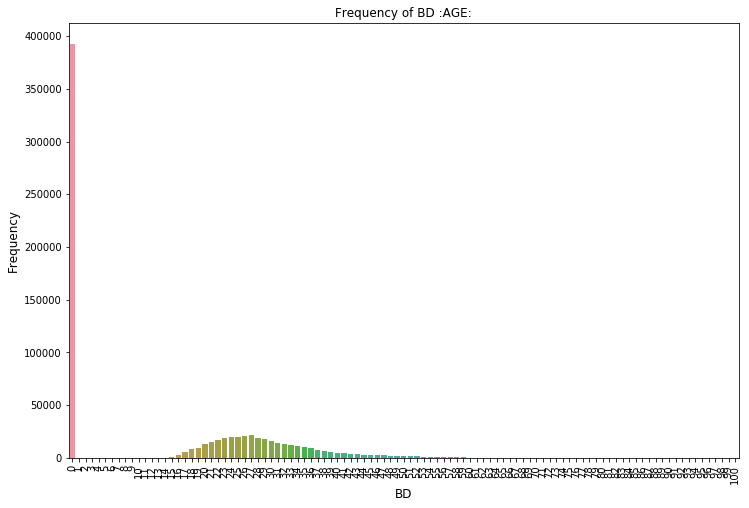

BD Count [(0, 392808), (27, 21722), (26, 20882), (25, 19772), (24, 19564), (28, 19156), (23, 18567), (29, 18348), (22, 17471), (30, 16084), (21, 15138), (31, 14027), (20, 13326), (32, 13321), (33, 12159), (34, 11068), (35, 9961), (19, 9627), (36, 9077), (18, 7995), (37, 7946), (38, 6844), (39, 5907), (17, 5755), (40, 5069), (41, 4614), (42, 3816), (43, 3321), (44, 2837), (46, 2677), (45, 2670), (47, 2562), (16, 2471), (48, 2241), (49, 2043), (50, 1767), (51, 1718), (52, 1513), (53, 1236), (54, 970), (55, 867), (15, 818), (56, 689), (57, 616), (58, 432), (59, 408), (60, 366), (61, 311), (14, 267), (62, 251), (63, 211), (64, 153), (65, 132), (67, 113), (66, 110), (68, 68), (69, 60), (13, 57), (70, 43), (72, 37), (73, 33), (71, 30), (84, 22), (74, 21), (12, 20), (77, 19), (1, 19), (91, 18), (75, 17), (95, 17), (89, 16), (76, 14), (6, 14), (5, 13), (92, 13), (81, 11), (10, 11), (100, 11), (79, 10), (7, 10), (4, 10), (97, 10), (11, 9), (90, 9), (78, 9), (93, 9), (2, 9), (96, 8), (86, 8), (8

In [607]:
bd_frequencesr = used_for_f_scores
plt.figure(figsize=(12,8))
bd_order = bd_frequencesr['bd'].unique()
bd_order = sorted(bd_order, key=lambda x: str(x))
bd_order = sorted(bd_order, key=lambda x: float(x))
#above repetion of commands are very silly, but this was the only way I was able to diplay what I wanted
sns.countplot(x="bd", data=used_for_f_scores , order = bd_order)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('BD', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of BD :AGE:", fontsize=12)
plt.show()
bd_count = Counter(bd_frequencesr['bd']).most_common()
print("BD Count " +str(bd_count))

In [608]:
temporay=bd_frequencesr.bd.value_counts()
temporay.head()

0     392808
27     21722
26     20882
25     19772
24     19564
Name: bd, dtype: int64

In [609]:
used_for_f_scores.describe()

,is_churn,city,bd,registered_via,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
count,754551.000000,754551.00000,754551.000000,754551.000000,754551.000000,754551.000000,754551.000000,754551.000000,754551.000000,754551.000000,754551.000000
mean,0.089643,6.26553,14.183389,6.867619,4.897232,1.141896,0.719132,0.818456,21.376208,22.065021,5644.646656
std,0.285669,6.51944,15.969446,2.006870,11.015358,3.018261,1.558269,2.243133,30.532544,26.296914,7530.889379
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.006000
25%,0.000000,1.00000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,4.000000,5.000000,1203.121000
50%,0.000000,4.00000,0.000000,7.000000,2.000000,0.000000,0.000000,0.000000,11.000000,13.000000,3137.926000
75%,0.000000,13.00000,27.000000,9.000000,5.000000,1.000000,1.000000,1.000000,26.000000,29.000000,7018.191000
max,1.000000,22.00000,100.000000,13.000000,880.000000,452.000000,162.000000,249.000000,2664.000000,823.000000,655283.384000


In [610]:
nominator = 14.183389*754551
new_mean = nominator / (754551-392808)
used_for_f_scores['bd'] = used_for_f_scores.bd.apply(lambda x: float(x) if x !=0 else new_mean ) 

In [611]:
used_for_f_scores.describe()

,is_churn,city,bd,registered_via,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
count,754551.000000,754551.00000,754551.000000,754551.000000,754551.000000,754551.000000,754551.000000,754551.000000,754551.000000,754551.000000,754551.000000
mean,0.089643,6.26553,29.584789,6.867619,4.897232,1.141896,0.719132,0.818456,21.376208,22.065021,5644.646656
std,0.285669,6.51944,6.048048,2.006870,11.015358,3.018261,1.558269,2.243133,30.532544,26.296914,7530.889379
min,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.006000
25%,0.000000,1.00000,28.000000,7.000000,0.000000,0.000000,0.000000,0.000000,4.000000,5.000000,1203.121000
50%,0.000000,4.00000,29.584789,7.000000,2.000000,0.000000,0.000000,0.000000,11.000000,13.000000,3137.926000
75%,0.000000,13.00000,29.584789,9.000000,5.000000,1.000000,1.000000,1.000000,26.000000,29.000000,7018.191000
max,1.000000,22.00000,100.000000,13.000000,880.000000,452.000000,162.000000,249.000000,2664.000000,823.000000,655283.384000


In [612]:
used_for_f_scores['registration_init_time'] = used_for_f_scores.registration_init_time.apply(lambda x: (datetime.now() - datetime.strptime(str(x)[:10], "%Y-%m-%d")).days if pd.notnull(x) else 0 )

In [613]:
used_for_f_scores.head()

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,0.0,1,29.584789,0.5,7,1648,2017-03-31,16.0,12.0,5.0,12.0,39.0,51.0,14239.044
1,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,0.0,15,26.000000,0,9,2946,2017-03-31,0.0,0.0,0.0,0.0,5.0,5.0,1287.132
2,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,0.0,1,29.584789,0.5,7,1537,2017-03-30,9.0,2.0,2.0,1.0,18.0,18.0,4921.827
3,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,0.0,18,21.000000,0,7,1002,2017-03-31,2.0,2.0,1.0,1.0,10.0,4.0,3266.534
4,++/UDNo9DLrxT8QVGiDi1OnWfczAdEwThaVyD0fXO50=,0.0,22,32.000000,0,9,2516,2017-03-30,0.0,0.0,0.0,0.0,3.0,3.0,838.686


In [590]:
used_for_f_scores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 754551 entries, 0 to 970959
Data columns (total 15 columns):
msno                      754551 non-null object
is_churn                  754551 non-null float64
city                      754551 non-null int64
bd                        754551 non-null float64
gender                    754551 non-null object
registered_via            754551 non-null int64
registration_init_time    754551 non-null int64
date                      754551 non-null object
num_25                    754551 non-null float64
num_50                    754551 non-null float64
num_75                    754551 non-null float64
num_985                   754551 non-null float64
num_100                   754551 non-null float64
num_unq                   754551 non-null float64
total_secs                754551 non-null float64
dtypes: float64(9), int64(3), object(3)
memory usage: 112.1+ MB


In [614]:
#used_for_f_scores.to_csv("thegreatet.csv")

In [615]:
used_for_perceptron = pd.read_csv('thegreatet.csv')

In [616]:
used_for_perceptron = used_for_perceptron.sample(frac=1).reset_index(drop=True)

In [617]:
used_for_perceptron.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754551 entries, 0 to 754550
Data columns (total 16 columns):
Unnamed: 0                754551 non-null int64
msno                      754551 non-null object
is_churn                  754551 non-null float64
city                      754551 non-null int64
bd                        754551 non-null float64
gender                    754551 non-null float64
registered_via            754551 non-null int64
registration_init_time    754551 non-null int64
date                      754551 non-null object
num_25                    754551 non-null float64
num_50                    754551 non-null float64
num_75                    754551 non-null float64
num_985                   754551 non-null float64
num_100                   754551 non-null float64
num_unq                   754551 non-null float64
total_secs                754551 non-null float64
dtypes: float64(10), int64(4), object(2)
memory usage: 92.1+ MB


In [618]:
used_for_perceptron.pop("date")

0         2017-03-31
1         2017-03-23
2         2017-03-31
3         2017-03-25
4         2017-03-28
5         2017-03-30
6         2017-03-13
7         2017-03-26
8         2017-03-31
9         2017-03-31
10        2017-03-31
11        2017-03-31
12        2017-03-31
13        2017-03-31
14        2017-03-30
15        2017-03-25
16        2017-03-05
17        2017-03-31
18        2017-03-05
19        2017-03-31
20        2017-03-28
21        2017-03-31
22        2017-03-30
23        2017-03-31
24        2017-03-30
25        2017-03-31
26        2017-03-29
27        2017-03-14
28        2017-03-31
29        2017-03-31
             ...    
754521    2017-03-22
754522    2017-03-31
754523    2017-03-30
754524    2017-03-19
754525    2017-03-28
754526    2017-03-31
754527    2017-03-31
754528    2017-03-31
754529    2017-03-30
754530    2017-03-31
754531    2017-03-29
754532    2017-03-21
754533    2017-03-30
754534    2017-03-31
754535    2017-03-07
754536    2017-03-28
754537    201

In [619]:
used_for_perceptron.pop("msno")

0         BL1ULbz++lrK5QtaeLXnxer4jnvyJRNRjRl6rfoLi68=
1         YMxamzl4O5MaH/wFSPEM1+zvU58ZO9YBV2gWQ2RYhHg=
2         tyaqsLa+8kQYGnLdVlwyei2KX80CPTT34kY5ezCCXDk=
3         NyAuscXD6YweW+eHt1iiZDKtHM6HzDsg0/dMMbWZW2s=
4         eO/n8AWXWsJLm+8VuYWPIEiw6FCLEf8tashmIiQWdF0=
5         W5Il3PZDGwIO3HLBdaGe6o9udEuDA143Oq8NPqqhdg0=
6         N7w3K90zPW8X1smZFgVL/GEg3lv+wSsKdc8Nn6wHhik=
7         UmXYHTupwHWvQ179bxKgxl108/ZFWQ//dJAFGd0UGuc=
8         pxX1jZKzM/GWopw467GKw9caw3DudoIPcP3HPbykxMU=
9         t68PMWPGnGm4rCcmT2Ov4k2qmJURskkl6utpW/i87Xs=
10        TDvK0xSPbjlZpS/wFumMAlq2Hyf31vZzuUZCORSm3kI=
11        J7tbC+dluU4OKbN70KuSLgO4PFk6IyGj4XFfqB3Zvt4=
12        l2bCrnzvCTIf6usNBwSKbQkhQm8MMQYlSQ+frxbJtt8=
13        AgJyuYlnWXkgoF/i4wEytretUGFCvToc3qiBjgGzsEE=
14        Uv1kcBPnigBgalPm/RqI6i0ur8c0m7eWU0ayWMKSUnw=
15        g76vPJvusQT2P8O1T+5xbQWgCwEiUgpj8/X3O+BqGhk=
16        21tzYla2JMovpn0wVqjq3iXUcCymAA6wzZNhPgcHTfs=
17        pp6UnyGmC+bSk9mBI0Oa2GUI2pdPwUa6+LNg6UVmWxw=
18        

In [713]:
dev_x = used_for_perceptron[500000:700000]
dev_y = used_for_perceptron_u[500000:700000]

In [714]:
from sklearn.metrics import precision_score 

In [715]:
y_pred = clf.predict(dev_x)
confusion_matrix(dev_y, y_pred)

array([[181678,    456],
       [ 17795,     71]])

In [723]:
precision_score(dev_y, pred, average="weighted" )

0.8414640384282602

In [724]:
from sklearn.metrics import recall_score

In [725]:
recall_score(dev_y, pred, average="weighted")

0.908745

In [726]:
f1_score(dev_y, pred, average="weighted")

0.8678053244145975